In [1]:
import os
import pandas as pd
import re

base_dir = "/home/ssahin/Desktop/temp_90ligand/temp_alphafold"
os.chdir(base_dir)  # optional

all_results = []

folder_pattern = re.compile(r'^([A-Z0-9]+)_cavity_(\d+)_(\w+)$')

for uniprot in os.listdir(base_dir):
    uniprot_path = os.path.join(base_dir, uniprot)
    if os.path.isdir(uniprot_path):
        for subfolder in os.listdir(uniprot_path):
            match = folder_pattern.match(subfolder)
            if match:
                uniprot_code, pdbcode, pocket_number = match.groups()
                result_file = os.path.join(uniprot_path, subfolder, 'final_results.csv')
                if os.path.isfile(result_file):
                    df = pd.read_csv(result_file)
                    df['uniprot'] = uniprot_code
                    df['pocket_number'] = pocket_number
                    df['pdbcode'] = pdbcode
                    all_results.append(df)

final_df = pd.concat(all_results, ignore_index=True)

In [3]:
final_df

,Tool1,Tool2,PoseNumber1,PoseNumber2,Score1,Score2,File1,File2,RMSD,uniprot,pocket_number,pdbcode
0,LeDock,GOLD,7,2,-3.80,55.22000,complex_7.pdb,complex_2.pdb,16.216860,P03372,EZT,1
1,LeDock,GOLD,7,1,-3.80,47.81000,complex_7.pdb,complex_1.pdb,8.822316,P03372,EZT,1
2,LeDock,GOLD,7,3,-3.80,46.91000,complex_7.pdb,complex_3.pdb,9.704405,P03372,EZT,1
3,LeDock,GOLD,7,5,-3.80,55.30000,complex_7.pdb,complex_5.pdb,16.110918,P03372,EZT,1
4,LeDock,GOLD,7,4,-3.80,55.40000,complex_7.pdb,complex_4.pdb,16.077782,P03372,EZT,1
...,...,...,...,...,...,...,...,...,...,...,...,...
127176,GOLD,Smina,4,19,53.33,-7.20190,complex_4.pdb,complex_19.pdb,25.952395,P00749,ui1,1
127177,GOLD,Smina,4,5,53.33,-7.62769,complex_4.pdb,complex_5.pdb,19.588096,P00749,ui1,1
127178,GOLD,Smina,4,12,53.33,-7.38247,complex_4.pdb,complex_12.pdb,20.892104,P00749,ui1,1
127179,GOLD,Smina,4,9,53.33,-7.43967,complex_4.pdb,complex_9.pdb,23.910528,P00749,ui1,1


In [3]:
final_df['uniprot_ligcode']= final_df['uniprot'] + '_' + final_df['ligcode']
final_df.head()

,Tool1,Tool2,PoseNumber1,PoseNumber2,Score1,Score2,File1,File2,RMSD,uniprot,pocket_number,ligcode,uniprot_ligcode
0,LeDock,GOLD,7,2,-3.8,55.22,complex_7.pdb,complex_2.pdb,16.216860,P03372,1,EZT,P03372_EZT
1,LeDock,GOLD,7,1,-3.8,47.81,complex_7.pdb,complex_1.pdb,8.822316,P03372,1,EZT,P03372_EZT
2,LeDock,GOLD,7,3,-3.8,46.91,complex_7.pdb,complex_3.pdb,9.704405,P03372,1,EZT,P03372_EZT
3,LeDock,GOLD,7,5,-3.8,55.30,complex_7.pdb,complex_5.pdb,16.110918,P03372,1,EZT,P03372_EZT
4,LeDock,GOLD,7,4,-3.8,55.40,complex_7.pdb,complex_4.pdb,16.077782,P03372,1,EZT,P03372_EZT


In [4]:
# For each unique uniprot_ligcode, how many rows showed an RMSD value lower than 2.0?
rmsd_counts = final_df[final_df['RMSD'] < 2.0].groupby('uniprot_ligcode').size().reset_index(name='count')

In [5]:
# For each unique uniprot_ligcode, how many rows are between PoseNumber1 = 1 and PoseNumber2 = 1 and showed an RMSD value lower than 2.0?
pose_counts = final_df[(final_df['PoseNumber1'] == 1) & (final_df['PoseNumber2'] == 1) & (final_df['RMSD'] < 2.0)].groupby('uniprot_ligcode').size().reset_index(name='count')

In [6]:
# For each unique uniprot_ligcode, how many of them showed an RMSD value lower than 2.0 with at least three different Tool1 and Tool2 combinations?
tool_counts = final_df[final_df['RMSD'] < 2.0].groupby('uniprot_ligcode').apply(lambda x: x[['Tool1', 'Tool2']].drop_duplicates().shape[0]).reset_index(name='unique_tool_combinations')


In [7]:
tool_counts

,uniprot_ligcode,unique_tool_combinations
0,O14757_agy,1
1,O14757_ucn,3
2,O14965_0c8,1
3,O14965_eml,1
4,O60674_0nv,3
5,O60674_1k3,1
6,O60674_jak,1
7,P00519_3yy,1
8,P00519_627,1
9,P00519_axi,1


In [8]:
len(final_df['uniprot_ligcode'].unique())

80

In [9]:
final_df.query('uniprot_ligcode == "O14757_ucn" & RMSD < 2.0').sort_values('RMSD')

,Tool1,Tool2,PoseNumber1,PoseNumber2,Score1,Score2,File1,File2,RMSD,uniprot,pocket_number,ligcode,uniprot_ligcode
104020,LeDock,GOLD,5,7,-4.84,45.46000,complex_5.pdb,complex_7.pdb,0.534082,O14757,3,ucn,O14757_ucn
104021,LeDock,GOLD,5,8,-4.84,45.24000,complex_5.pdb,complex_8.pdb,0.562234,O14757,3,ucn,O14757_ucn
104027,LeDock,GOLD,5,4,-4.84,45.38000,complex_5.pdb,complex_4.pdb,0.572007,O14757,3,ucn,O14757_ucn
102452,LeDock,GOLD,5,1,-4.43,48.14000,complex_5.pdb,complex_1.pdb,0.711960,O14757,2,ucn,O14757_ucn
100433,LeDock,GOLD,7,13,-4.78,59.71000,complex_7.pdb,complex_13.pdb,0.833644,O14757,5,ucn,O14757_ucn
100427,LeDock,GOLD,7,15,-4.78,59.57000,complex_7.pdb,complex_15.pdb,0.902975,O14757,5,ucn,O14757_ucn
100424,LeDock,GOLD,7,11,-4.78,59.89000,complex_7.pdb,complex_11.pdb,0.903910,O14757,5,ucn,O14757_ucn
100438,LeDock,GOLD,7,19,-4.78,60.53000,complex_7.pdb,complex_19.pdb,0.978614,O14757,5,ucn,O14757_ucn
100437,LeDock,GOLD,7,17,-4.78,60.32000,complex_7.pdb,complex_17.pdb,0.982714,O14757,5,ucn,O14757_ucn
100429,LeDock,GOLD,7,16,-4.78,60.42000,complex_7.pdb,complex_16.pdb,0.993453,O14757,5,ucn,O14757_ucn


In [4]:
def tool_specific_filter(row):
    # Tool1
    if row['Tool1'] == 'SMINA' and row['Score1'] <= -7:
        return True
    if row['Tool1'] == 'LeDock' and row['Score1'] <= -5:
        return True
    if row['Tool1'] == 'GOLD' and row['Score1'] >= 70:
        return True
    # Tool2
    if row['Tool2'] == 'SMINA' and row['Score2'] <= -7:
        return True
    if row['Tool2'] == 'LeDock' and row['Score2'] <= -5:
        return True
    if row['Tool2'] == 'GOLD' and row['Score2'] >= 70:
        return True
    return False

filtered_df = final_df[final_df.apply(tool_specific_filter, axis=1)].copy()

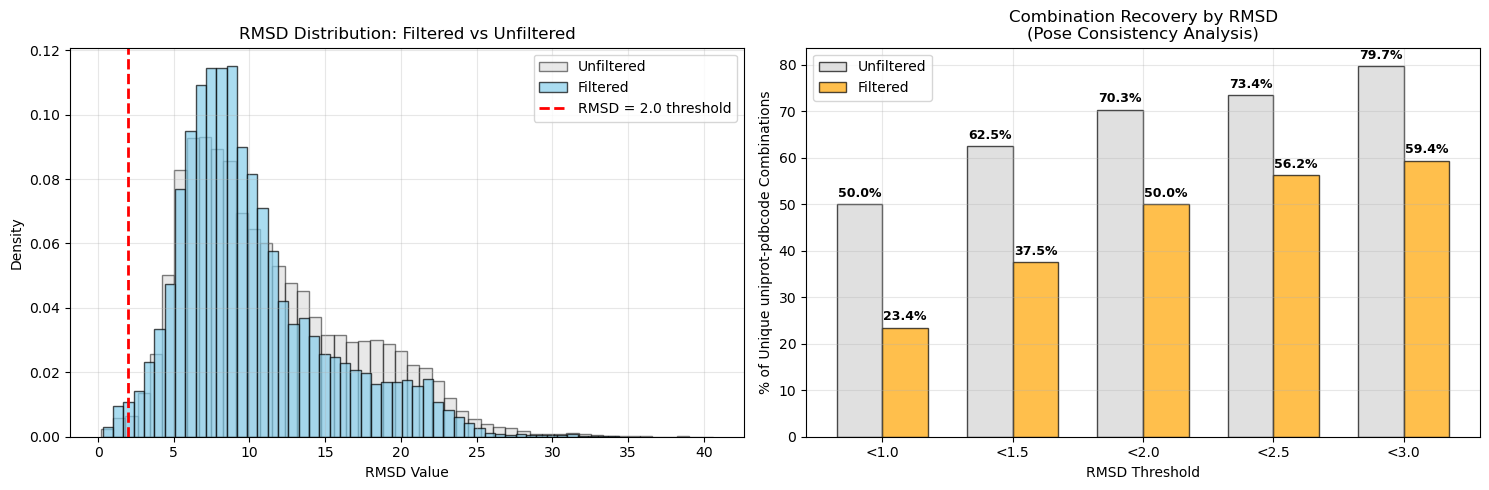

In [9]:
import matplotlib.pyplot as plt
import numpy as np

rmsd_col = 'RMSD'
rmsd_values_unfiltered = final_df[rmsd_col].dropna()
rmsd_values_filtered = filtered_df[rmsd_col].dropna()

thresholds = [1.0, 1.5, 2.0, 2.5, 3.0]
def unique_combos(df, threshold):
    return df[df[rmsd_col] < threshold][['uniprot', 'pdbcode']].drop_duplicates().shape[0]
total_combos = final_df[['uniprot', 'pdbcode']].drop_duplicates().shape[0]
unique_combos_unfiltered = [unique_combos(final_df, t) for t in thresholds]
percentage_unfiltered = [v / total_combos * 100 for v in unique_combos_unfiltered]
unique_combos_filtered = [unique_combos(filtered_df, t) for t in thresholds]
percentage_filtered = [v / total_combos * 100 for v in unique_combos_filtered]

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. Histogram
axes[0].hist(rmsd_values_unfiltered, bins=50, alpha=0.5, color='lightgray', edgecolor='black', label='Unfiltered', density=True)
axes[0].hist(rmsd_values_filtered, bins=50, alpha=0.7, color='skyblue', edgecolor='black', label='Filtered', density=True)
axes[0].axvline(x=2.0, color='red', linestyle='--', linewidth=2, label='RMSD = 2.0 threshold')
axes[0].set_xlabel('RMSD Value')
axes[0].set_ylabel('Density')
axes[0].set_title('RMSD Distribution: Filtered vs Unfiltered')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Bar plot: % unique combinations recovered by RMSD threshold
x_pos = np.arange(len(thresholds))
width = 0.35
bars1 = axes[1].bar(x_pos - width/2, percentage_unfiltered, width, alpha=0.7, color='lightgray', edgecolor='black', label='Unfiltered')
bars2 = axes[1].bar(x_pos + width/2, percentage_filtered, width, alpha=0.7, color='orange', edgecolor='black', label='Filtered')
axes[1].set_xlabel('RMSD Threshold')
axes[1].set_ylabel('% of Unique uniprot-pdbcode Combinations')
axes[1].set_title('Combination Recovery by RMSD\n(Pose Consistency Analysis)')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels([f'<{t}' for t in thresholds])
axes[1].legend()
axes[1].grid(True, alpha=0.3)
for bar, value in zip(bars1, percentage_unfiltered):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{value:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)
for bar, value in zip(bars2, percentage_filtered):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{value:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

In [8]:
print(final_df.columns)

Index(['Tool1', 'Tool2', 'PoseNumber1', 'PoseNumber2', 'Score1', 'Score2',
       'File1', 'File2', 'RMSD', 'uniprot', 'pocket_number', 'pdbcode'],
      dtype='object')
